# Random Forest

## Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# Set working directory
month_file = '6_October'
# Set working directory
os.chdir("/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/"+month_file+"/Ending Balances/Per_Player")

## Top Players

In [3]:
# Filter Columns
filter = ['gender', 'age_gen', 'day', 'timeofday', 'first_outcome',
        'first_wager','first_p/b', 'last_outcome', 'last_wager', 'last_p/b',
        'beginning_amt', 'ending_amt', 'ending_balance',  'ave_slotdenom', 
        'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
        'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
        'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope', 
        '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet', '#dec_maxbet', 
        '#W', '#L', '#NH', '#D', '#2ws', '#3ws', '#4ws',
        'w/min', 'l/min', '2ws/min', '3ws/min', '4ws/min',
        'nh/min', 'd/min', 'w/g', 'l/g', 'nh/g', 'd/g', 
        'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
        'machines_changes', 'unique_machines', 'ave_time_per_machine',
        'total_duration', 'total_gambles', 'continue_playing']


# Load dataset
dataset = pd.read_parquet('top_players_continuation_by_session.parquet', columns=filter)

# # Seperate dependent and independent variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Econde gender column (Binary)
le = LabelEncoder()

# Binary Encode gender
X[:, 0] = le.fit_transform(X[:, 0])

# # Encode age_generartion, first_outoce, last_outcome columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2, 3, 4, 7])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

sc = StandardScaler()

# Scale all columns except the encoded ones
X_train[:, 25:] = sc.fit_transform(X_train[:, 25:])
X_test[:, 25:] = sc.transform(X_test[:, 25:])

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, y_pred, average='macro'))

[[ 76  42]
 [ 46 143]]
Accuracy:  0.7133550488599348
Precision:  0.697961896322552
Recall:  0.700340776611963
F1 Score:  0.6990196078431372


### Which IDVs have the most weight in the model

In [4]:
# Create a dictionary mapping column names to their index positions
column_index_mapping = {index: column_name for index, column_name in enumerate(dataset.columns)}

# Print the dictionary
print(column_index_mapping)

{0: 'gender', 1: 'age_gen', 2: 'day', 3: 'timeofday', 4: 'first_outcome', 5: 'first_wager', 6: 'first_p/b', 7: 'last_outcome', 8: 'last_wager', 9: 'last_p/b', 10: 'beginning_amt', 11: 'ending_amt', 12: 'ending_balance', 13: 'ave_slotdenom', 14: 'std_slotdenom', 15: 'min_slotdenom', 16: 'max_slotdenom', 17: 'ave_theo_payback', 18: 'min_theo_payback', 19: 'max_theo_payback', 20: 'ave_wageramt', 21: 'std_wageramt', 22: 'min_wager', 23: 'max_wager', 24: 'ave_p/b', 25: 'std_p/b', 26: 'max_p/b', 27: 'max_profit', 28: 'depletion_slope', 29: '#inc_slotdenom', 30: '#dec_slotdenom', 31: '#inc_maxbet', 32: '#dec_maxbet', 33: '#W', 34: '#L', 35: '#NH', 36: '#D', 37: '#2ws', 38: '#3ws', 39: '#4ws', 40: 'w/min', 41: 'l/min', 42: '2ws/min', 43: '3ws/min', 44: '4ws/min', 45: 'nh/min', 46: 'd/min', 47: 'w/g', 48: 'l/g', 49: 'nh/g', 50: 'd/g', 51: 'ave_time_per_gamble', 52: 'min_time_per_gamble', 53: 'max_time_per_gamble', 54: 'machines_changes', 55: 'unique_machines', 56: 'ave_time_per_machine', 57: 't

In [5]:
from sklearn.inspection import permutation_importance

# Assuming you have a trained classifier named 'classifier' and encoded data named 'X_encoded'
# Calculate permutation importances
result = permutation_importance(classifier, X_train, y_train, n_repeats=10, random_state=42)

# Get feature importances and feature names
importances = result.importances_mean
feature_names = ct.get_feature_names_out()

# Sort feature importances
feature_importance = list(zip(feature_names, importances))
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print feature importances
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")


remainder__x57: 0.06076672104404566
encoder__x3_night: 0.06011419249592165
remainder__x42: 0.03637846655791188
remainder__x53: 0.033278955954322974
remainder__x56: 0.02455138662316473
remainder__x41: 0.021125611745513827
remainder__x21: 0.01647634584013047
remainder__x33: 0.016231647634583967
remainder__x46: 0.015660685154975505
remainder__x51: 0.014600326264274033
remainder__x19: 0.011663947797716123
remainder__x10: 0.011337683523654118
remainder__x55: 0.010848287112561139
remainder__x40: 0.010603588907014638
remainder__x36: 0.01019575856443714
remainder__x45: 0.009461663947797693
encoder__x3_afternoon: 0.009053833605220185
remainder__x13: 0.008890701468189188
remainder__x58: 0.008727569331158203
remainder__x47: 0.008646003262642699
remainder__x5: 0.008482871125611724
remainder__x48: 0.008319738988580693
remainder__x12: 0.00815660685154972
remainder__x34: 0.007993474714518712
remainder__x28: 0.007585644371941214
remainder__x26: 0.007259380097879231
remainder__x50: 0.007014681892332753

## Cumulative Accuracy Profile (CAP) Graph

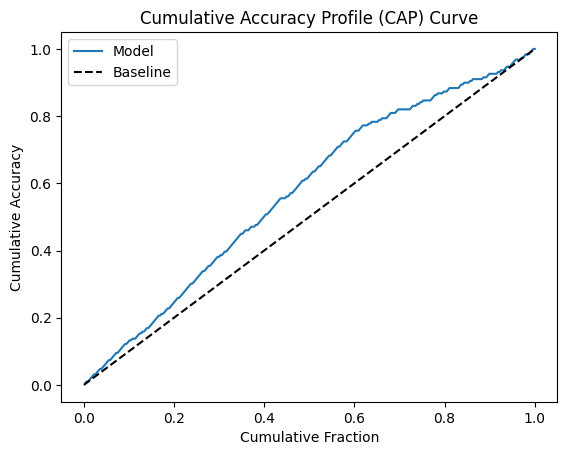

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the predicted probabilities or scores named 'predicted_scores' and true labels named 'true_labels'

# Sort the scores and corresponding true labels
sorted_indices = np.argsort(y_pred)[::-1]
sorted_true_labels = y_test[sorted_indices]

# Calculate cumulative metrics
total_positive = np.sum(y_test)
cumulative_positives = np.cumsum(sorted_true_labels)
cumulative_accuracy = cumulative_positives / total_positive
cumulative_fraction = np.arange(1, len(sorted_true_labels) + 1) / len(sorted_true_labels)

# Create the CAP curve plot
plt.plot(cumulative_fraction, cumulative_accuracy, label='Model')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('Cumulative Fraction')
plt.ylabel('Cumulative Accuracy')
plt.title('Cumulative Accuracy Profile (CAP) Curve')
plt.legend()
plt.show()

## Bottom Players

In [7]:
# Filter Columns
filter = ['gender', 'age_gen', 'day', 'timeofday', 'first_outcome',
        'first_wager','first_p/b', 'last_outcome', 'last_wager', 'last_p/b',
        'beginning_amt', 'ending_amt', 'ending_balance',  'ave_slotdenom', 
        'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
        'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
        'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope', 
        '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet', '#dec_maxbet', 
        '#W', '#L', '#NH', '#D', '#2ws', '#3ws', '#4ws',
        'w/min', 'l/min', '2ws/min', '3ws/min', '4ws/min',
        'nh/min', 'd/min', 'w/g', 'l/g', 'nh/g', 'd/g', 
        'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
        'machines_changes', 'unique_machines', 'ave_time_per_machine',
        'total_duration', 'total_gambles', 'continue_playing']


# Load dataset
dataset = pd.read_parquet('ntop_players_continuation_by_session.parquet', columns=filter)

# # Seperate dependent and independent variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Econde gender column (Binary)
le = LabelEncoder()

# Binary Encode gender
X[:, 0] = le.fit_transform(X[:, 0])

# # Encode age_generartion, first_outoce, last_outcome columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2, 3, 4, 7])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

sc = StandardScaler()

# Scale all columns except the encoded ones
X_train[:, 25:] = sc.fit_transform(X_train[:, 25:])
X_test[:, 25:] = sc.transform(X_test[:, 25:])

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, y_pred, average='macro'))

[[928  57]
 [282  59]]
Accuracy:  0.744343891402715
Precision:  0.6377814192077516
Recall:  0.5575762537773346
F1 Score:  0.5518818879191318


In [8]:
# Create a dictionary mapping column names to their index positions
column_index_mapping = {index: column_name for index, column_name in enumerate(dataset.columns)}

# Print the dictionary
print(column_index_mapping)

{0: 'gender', 1: 'age_gen', 2: 'day', 3: 'timeofday', 4: 'first_outcome', 5: 'first_wager', 6: 'first_p/b', 7: 'last_outcome', 8: 'last_wager', 9: 'last_p/b', 10: 'beginning_amt', 11: 'ending_amt', 12: 'ending_balance', 13: 'ave_slotdenom', 14: 'std_slotdenom', 15: 'min_slotdenom', 16: 'max_slotdenom', 17: 'ave_theo_payback', 18: 'min_theo_payback', 19: 'max_theo_payback', 20: 'ave_wageramt', 21: 'std_wageramt', 22: 'min_wager', 23: 'max_wager', 24: 'ave_p/b', 25: 'std_p/b', 26: 'max_p/b', 27: 'max_profit', 28: 'depletion_slope', 29: '#inc_slotdenom', 30: '#dec_slotdenom', 31: '#inc_maxbet', 32: '#dec_maxbet', 33: '#W', 34: '#L', 35: '#NH', 36: '#D', 37: '#2ws', 38: '#3ws', 39: '#4ws', 40: 'w/min', 41: 'l/min', 42: '2ws/min', 43: '3ws/min', 44: '4ws/min', 45: 'nh/min', 46: 'd/min', 47: 'w/g', 48: 'l/g', 49: 'nh/g', 50: 'd/g', 51: 'ave_time_per_gamble', 52: 'min_time_per_gamble', 53: 'max_time_per_gamble', 54: 'machines_changes', 55: 'unique_machines', 56: 'ave_time_per_machine', 57: 't

In [9]:
from sklearn.inspection import permutation_importance

# Assuming you have a trained classifier named 'classifier' and encoded data named 'X_encoded'
# Calculate permutation importances
result = permutation_importance(classifier, X_train, y_train, n_repeats=10, random_state=42)

# Get feature importances and feature names
importances = result.importances_mean
feature_names = ct.get_feature_names_out()

# Sort feature importances
feature_importance = list(zip(feature_names, importances))
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print feature importances
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")


remainder__x53: 0.06653469079939667
remainder__x57: 0.048774509803921506
encoder__x3_night: 0.043212669683257876
remainder__x10: 0.03161764705882353
remainder__x40: 0.029619155354449478
remainder__x41: 0.025886123680241346
remainder__x55: 0.022812971342383102
remainder__x8: 0.021021870286576094
remainder__x46: 0.020757918552036136
remainder__x11: 0.020531674208144723
remainder__x47: 0.019834087481146234
remainder__x58: 0.019193061840120595
remainder__x48: 0.018966817496229194
remainder__x49: 0.0179298642533936
remainder__x26: 0.016968325791855143
remainder__x23: 0.016553544494720906
remainder__x50: 0.015573152337858165
remainder__x51: 0.01538461538461533
remainder__x28: 0.01495098039215681
remainder__x42: 0.014649321266968274
remainder__x37: 0.014385369532428305
remainder__x17: 0.01414027149321262
remainder__x12: 0.013951734539969785
remainder__x25: 0.013932880844645501
remainder__x20: 0.013914027149321218
remainder__x27: 0.012820512820512775
remainder__x24: 0.012782805429864208
remain

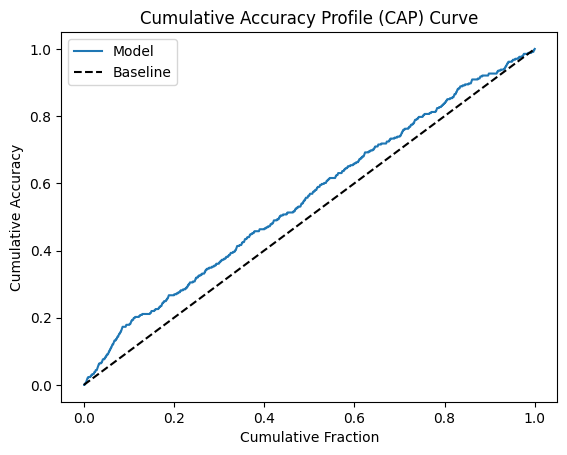

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the predicted probabilities or scores named 'predicted_scores' and true labels named 'true_labels'

# Sort the scores and corresponding true labels
sorted_indices = np.argsort(y_pred)[::-1]
sorted_true_labels = y_test[sorted_indices]

# Calculate cumulative metrics
total_positive = np.sum(y_test)
cumulative_positives = np.cumsum(sorted_true_labels)
cumulative_accuracy = cumulative_positives / total_positive
cumulative_fraction = np.arange(1, len(sorted_true_labels) + 1) / len(sorted_true_labels)

# Create the CAP curve plot
plt.plot(cumulative_fraction, cumulative_accuracy, label='Model')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('Cumulative Fraction')
plt.ylabel('Cumulative Accuracy')
plt.title('Cumulative Accuracy Profile (CAP) Curve')
plt.legend()
plt.show()